# Домашнее задание по теме "Работа с переменными"

Задание  
Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный   анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все  ваши действия и решения описывайте в markdown.  
Данные вы сможете получить исполнив следующий код:  
from sklearn.datasets import load_boston  
import pandas as pd  
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)  
Переменная, которую надо предсказать - ’MEDV’.  
Прочитать информацию о содержимом датасета:  
print(load_boston()[‘DESCR’])  
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.  
Цель задания - закрепить полученные навыки.  

In [491]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Получим данные:

In [492]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

# 2. Описание данных:

In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [494]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [495]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Видим, что в пропусков в данных нет. Есть нулевые значения, и, возможно, выбросы (это проверим дальше).

# 3. Будем использовать линейную регрессию для тестирования качества данных

In [578]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [579]:
def get_score(X,y, random_seed=42, model=None):
      if model is None:
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        return model.score(X_test, y_test), mean_absolute_error(y_test, pred)

In [580]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [581]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

# 4. Оценим качество на "сырых" данных

In [582]:
get_score(data.dropna()[cols], data.dropna()['MEDV'])

KeyError: "['B', 'AGE'] not in index"

# 5. Качество нас не устраивает, постараемся его улучшить

Для поиска выбросов будем использовать boxplot

In [506]:
def get_boxplot(X, columns=[]):
      for i in columns:
        sns.boxplot(x=X[i])
        pass  

def get_pairplot(X, columns=None):
      if columns is None:
        columns = list(X.columns)
        sns.pairplot(X[columns])
        pass

In [507]:
cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

### Масштабируем признаки:

In [508]:
data_trial = data.copy()
for col in data_trial.columns:
    if col != 'MEDV':
        data_trial[col] = (data_trial[col] - data_trial[col].min())/(data_trial[col].max() - data_trial[col].min())

In [509]:
data_trial.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [510]:
get_score(data[cols], data['MEDV'])

(0.7112260057484956, 3.162709871457383)

In [511]:
get_score(data_trial[cols], data_trial['MEDV'])

(0.7112260057484923, 3.1627098714574107)

Разницы почти нет.

### Проверим, нет ли "лишних" столбцов

Нет ли столбцов, наличие которых не влияет на качество предсказания, или ухудшает его.

In [512]:
print(cols)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [516]:
for col in cols:
    reduced  = list(set(cols) - set([col]))
    print(f'Column: {col}')
    score = get_score(data[reduced], data['MEDV'])[0]
    delta = get_score(data[cols], data['MEDV'])[0] - score
    print(f'Score: {score}')
    print(f'Delta: {delta}')
    print()
    

Column: CRIM
Score: 0.7150613796634314
Delta: -0.0038353739149358246

Column: ZN
Score: 0.6978310920990278
Delta: 0.013394913649467766

Column: INDUS
Score: 0.7124101740617512
Delta: -0.001184168313255629

Column: CHAS
Score: 0.7088141357902249
Delta: 0.002411869958270696

Column: NOX
Score: 0.6905371882001332
Delta: 0.02068881754836238

Column: RM
Score: 0.6830523215989459
Delta: 0.028173684149549683

Column: AGE
Score: 0.7138676903216816
Delta: -0.0026416845731860317

Column: DIS
Score: 0.6701994769614268
Delta: 0.041026528787068806

Column: RAD
Score: 0.6883010754490937
Delta: 0.022924930299401902

Column: TAX
Score: 0.6983850039833555
Delta: 0.012841001765140136

Column: PTRATIO
Score: 0.6764211979458749
Delta: 0.03480480780262074

Column: B
Score: 0.7166209449097775
Delta: -0.005394939161281864

Column: LSTAT
Score: 0.6752477487969473
Delta: 0.035978256951548326



In [517]:
cols_new = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
get_score(data[cols_new], data['MEDV'])

(0.7180964922948232, 3.1346159594135763)

Признак CRIM не будем убирать, так как по смыслу он кажется важным, и может быть связан с другими признаками тоже (хотя на первый взгляд может показаться, что без него качество может быть лучше).
Он описывает уровень преступности на душу населения по районам. Такой показатель должен влиять на стоимость недвижимости.

In [518]:
cols_new = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
get_score(data[cols_new], data['MEDV'])

(0.7190673146383938, 3.1617144375520936)

In [519]:
cols_new = ['CRIM','ZN', 'CHAS', 'NOX', 'RM', 'DIS','RAD','TAX', 'PTRATIO', 'LSTAT']
get_score(data[cols_new], data['MEDV'])

(0.7195930224733418, 3.151282812623047)

Рассмотрим признаки "AGE", "B", "INDUS".

- AGE - доля занятых владельцами помещений, построенных до 1940 года 

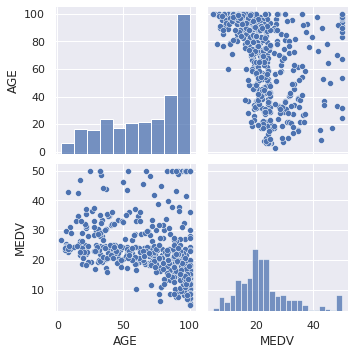

In [520]:
sns.set(font_scale=1) 
get_pairplot(data[['AGE','MEDV']])

Сложно сказать,насколько сильно этот показатель влияет на стоимость жилья. Старые, но хорошие, красивые, культурно ценные дома могут стоить дорого. Так же старые дома могут быть дешевле новых, если у них низкое качество, и они требуют больших вложений.  
Очевидной взаимосвязи с целевой переменной по графику так же нет.  

- B - 1000 (Bk - 0.63)^2 где Bk-доля афроамериканцев по городам  

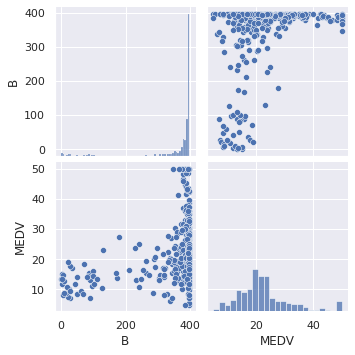

In [521]:
sns.set(font_scale=1) 
get_pairplot(data[['B','MEDV']])

Может показаться, что этот показатель должен влиять на стоимость жилья, но как видим по графикам, это происходит далеко не всегда, и ситуация не так однозначна.

- INDUS - доля площадей, занятых под не розничный бизнес, по городам

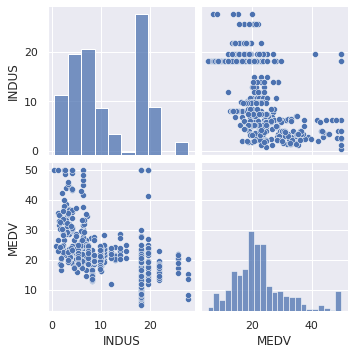

In [522]:
sns.set(font_scale=1) 
get_pairplot(data[['INDUS','MEDV']])

Этот признак, кажется, может и повышать, и понижать стоимость жилья. Зависит от того, чем заняты эти площади.

In [523]:
cols_new = ['CRIM','ZN', 'CHAS', 'NOX', 'RM', 'DIS','RAD','TAX', 'PTRATIO', 'LSTAT','INDUS']

Итак, продолжим исследование без признаков "AGE" и "B".

In [524]:
data = data.drop(['AGE', 'B'], axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,6.0622,3,222,18.7,5.33,36.2


### Проанализируем данные на наличие выбросов. 

In [525]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


По этой таблице можем предположить, что нужно уделить внимание проверке выбросов у следующих признаков:
- CRIM (макс. значение заметно отличается от основной массы)   
- ZN (аналогично)  
- DIS (аналогично) 
- LSTAT (аналогично)

Остальные показатели выглядят нормальными.

CRIM

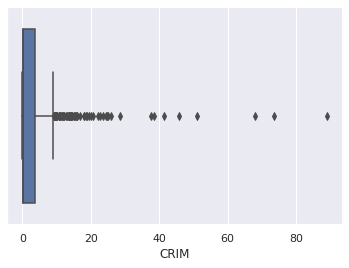

In [526]:
get_boxplot(data[cols_new],[cols_new[0]])

Видим длинный хвост справа. Посмотрим, какие там данные.

Выберем порог для признака:

In [527]:
threshold = 15

In [528]:
data[data['CRIM'] > threshold].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,30.000000,30.0,3.000000e+01,30.0,30.000000,30.000000,30.000000,30.0,30.0,3.000000e+01,30.000000,30.000000
mean,29.509060,0.0,1.810000e+01,0.0,0.672367,5.623533,1.613690,24.0,666.0,2.020000e+01,24.643667,10.586667
std,18.846821,0.0,3.613448e-15,0.0,0.039025,0.818402,0.333936,0.0,0.0,3.613448e-15,6.622735,3.654636
min,15.023400,0.0,1.810000e+01,0.0,0.580000,4.138000,1.137000,24.0,666.0,2.020000e+01,10.110000,5.000000
25%,17.921175,0.0,1.810000e+01,0.0,0.671000,5.185500,1.418725,24.0,666.0,2.020000e+01,20.735000,8.300000
50%,22.324100,0.0,1.810000e+01,0.0,0.679000,5.720000,1.536550,24.0,666.0,2.020000e+01,24.040000,10.400000
75%,35.410375,0.0,1.810000e+01,0.0,0.693000,6.189500,1.777650,24.0,666.0,2.020000e+01,28.857500,12.825000
max,88.976200,0.0,1.810000e+01,0.0,0.740000,7.313000,2.908400,24.0,666.0,2.020000e+01,37.970000,19.100000


In [529]:
len(data[data['CRIM'] > threshold]) 

30

In [530]:
#  Посмотрим, сколько у нас таких записей в процентах от общего количества:
len(data[data['CRIM'] > threshold])/len(data)*100

5.928853754940711

Таких значений не очень много, можем позволить себе их дальше не учитывать. Также видим, что на этиъ выборсаъ ряд переменных почти не меняется - ZN, TAX, INDUS

In [531]:
data_red = data.copy()
data_red = data[data['CRIM'] < threshold]
get_score(data_red[cols_new], data_red['MEDV'])

(0.7971230443374159, 2.9883018824850005)

Убрав выбросы этого признака, получили значительный рост качества.

ZN

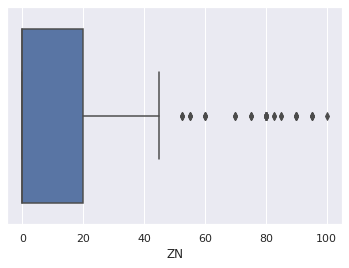

In [532]:
get_boxplot(data_red[cols_new],['ZN'])

In [533]:
# Выберем порог для признака:
threshold = 50

In [534]:
data_red[data_red['ZN'] > threshold].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.034260,76.944444,2.730000,0.022222,0.410693,6.741689,7.435493,3.377778,306.577778,16.600000,5.927333,29.466667
std,0.020905,13.108907,1.306976,0.149071,0.019121,0.597162,1.741321,1.541677,63.073006,2.206293,2.635090,8.843822
min,0.009060,52.500000,0.460000,0.000000,0.385000,5.663000,5.116700,1.000000,187.000000,12.600000,1.980000,18.200000
25%,0.017780,70.000000,1.690000,0.000000,0.401000,6.315000,6.219600,2.000000,252.000000,14.800000,4.320000,23.100000
50%,0.033590,80.000000,2.250000,0.000000,0.405000,6.696000,7.309000,4.000000,313.000000,16.600000,5.030000,28.500000
75%,0.043010,85.000000,3.640000,0.000000,0.413000,7.107000,8.344000,4.000000,348.000000,17.900000,7.430000,33.300000
max,0.106590,100.000000,5.320000,1.000000,0.484000,8.034000,12.126500,6.000000,469.000000,22.000000,14.800000,50.000000


In [535]:
#  Посмотрим, сколько у нас таких записей в процентах от общего количества:
len(data_red[data_red['ZN'] > threshold])/len(data_red)*100

9.453781512605042

In [536]:
get_score(data_red[cols_new][data_red['ZN'] < threshold], data_red['MEDV'][data_red['ZN'] < threshold])

(0.7632372602373981, 2.9454698511472333)

In [537]:
# Качество упало. Поменяем порог:

In [538]:
threshold = 80

In [539]:
get_score(data_red[cols_new][data_red['ZN'] < threshold], data_red['MEDV'][data_red['ZN'] < threshold])

(0.7251238432986258, 3.0250151793408326)

Не будем ничего менять. Оставим этот признак в изначальном виде. Кроме того, данные выглядят нормальными, что подтверждает, что их можно оставить.

DIS

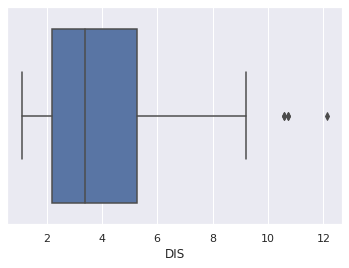

In [540]:
get_boxplot(data_red[cols_new],['DIS'])

In [541]:
threshold = 10

In [542]:
data_red[data_red['DIS'] > threshold].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,5.000000,5.000000,5.00000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.063726,74.000000,1.84400,0.0,0.411600,6.158000,10.943700,4.200000,335.400000,19.520000,6.280000,22.320000
std,0.034519,13.416408,0.14758,0.0,0.001342,0.466778,0.664134,0.447214,91.456547,2.325296,1.558012,4.936294
min,0.017090,60.000000,1.69000,0.0,0.410000,5.663000,10.585700,4.000000,187.000000,17.000000,4.500000,18.200000
25%,0.043010,60.000000,1.69000,0.0,0.411000,5.884000,10.585700,4.000000,334.000000,18.300000,5.490000,18.600000
50%,0.072440,80.000000,1.91000,0.0,0.411000,5.936000,10.710300,4.000000,334.000000,18.300000,5.570000,20.600000
75%,0.079500,80.000000,1.91000,0.0,0.413000,6.579000,10.710300,4.000000,411.000000,22.000000,7.790000,24.100000
max,0.106590,90.000000,2.02000,0.0,0.413000,6.728000,12.126500,5.000000,411.000000,22.000000,8.050000,30.100000


In [543]:
get_score(data_red[cols_new][data_red['DIS'] < threshold], data_red['MEDV'][data_red['DIS'] < threshold])

(0.7348516029559115, 2.9259708143270715)

Не будем ничего менять. Оставим этот признак в изначальном виде. Кроме того, данные выглядят нормальными, что подтверждает, что их можно оставить.

LSTAT

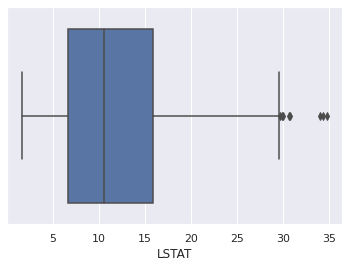

In [544]:
get_boxplot(data_red[cols_new],['LSTAT'])

In [545]:
threshold = 31

In [546]:
data_red[data_red['LSTAT'] > threshold].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,3.000000,3.0,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0000,3.000000
mean,8.804947,0.0,19.363333,0.0,0.677333,5.286667,1.478067,17.333333,589.666667,20.533333,34.4000,12.200000
std,6.346318,0.0,2.188158,0.0,0.058561,0.564309,0.324930,11.547005,132.213212,0.577350,0.3751,3.304542
min,1.628640,0.0,18.100000,0.0,0.624000,4.906000,1.174200,4.000000,437.000000,20.200000,34.0200,8.400000
25%,6.368370,0.0,18.100000,0.0,0.646000,4.962500,1.306800,14.000000,551.500000,20.200000,34.2150,11.100000
50%,11.108100,0.0,18.100000,0.0,0.668000,5.019000,1.439400,24.000000,666.000000,20.200000,34.4100,13.800000
75%,12.393100,0.0,19.995000,0.0,0.704000,5.477000,1.630000,24.000000,666.000000,20.700000,34.5900,14.100000
max,13.678100,0.0,21.890000,0.0,0.740000,5.935000,1.820600,24.000000,666.000000,21.200000,34.7700,14.400000


In [547]:
get_score(data_red[cols_new][data_red['LSTAT'] < threshold], data_red['MEDV'][data_red['LSTAT'] < threshold])

(0.6342478963485724, 3.1861876254757946)

Не будем ничего менять. Оставим этот признак в изначальном виде. Кроме того, данные выглядят нормальными, что подтверждает, что их можно оставить.

In [548]:
get_score(data_red[cols_new], data_red['MEDV'])

(0.7971230443374159, 2.9883018824850005)

Итак, по итогам проведенной работы нам удалось повысить точность и уменьшить ошибку. Данные изначально были неплохого качества (не было пропусков, мало выбросов). Возможно, дополнительная работа или другая модель помогут достичь более высоких результатов.